In [1]:
import pandas as pd
import numpy as np
import imblearn

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
import seaborn as sns

/home/masoud/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

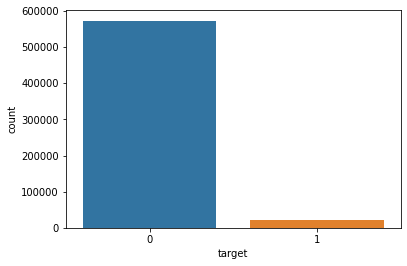

In [6]:
sns.countplot('target', data=data)

In [8]:
data.groupby('target')['id'].count() / len(data)

target
0    0.963552
1    0.036448
Name: id, dtype: float64

In [9]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from catboost import CatBoostClassifier

In [16]:
X = data.iloc[:, 2:]
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [19]:
y = data['target']

In [17]:
cat_col = [i for i in range(0, len(X.columns)) if 'cat' in X.columns[i]]
cat_col

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [25]:
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.9633318	test: 0.9642144	best: 0.9642144 (0)	total: 190ms	remaining: 18.8s
10:	learn: 0.9633318	test: 0.9642144	best: 0.9642144 (0)	total: 2.01s	remaining: 16.2s
20:	learn: 0.9633341	test: 0.9642144	best: 0.9642144 (0)	total: 3.73s	remaining: 14s
30:	learn: 0.9633341	test: 0.9642144	best: 0.9642212 (28)	total: 5.55s	remaining: 12.4s
40:	learn: 0.9633430	test: 0.9642144	best: 0.9642212 (28)	total: 7.39s	remaining: 10.6s
50:	learn: 0.9633587	test: 0.9642144	best: 0.9642212 (28)	total: 9.08s	remaining: 8.73s
60:	learn: 0.9633610	test: 0.9642144	best: 0.9642212 (28)	total: 10.9s	remaining: 6.98s
70:	learn: 0.9633610	test: 0.9642212	best: 0.9642212 (28)	total: 12.9s	remaining: 5.27s
80:	learn: 0.9633610	test: 0.9642212	best: 0.9642212 (28)	total: 14.6s	remaining: 3.42s
90:	learn: 0.9633610	test: 0.9642279	best: 0.9642279 (87)	total: 16.3s	remaining: 1.61s
99:	learn: 0.9633632	test: 0.9642144	best: 0.9642279 (87)	total: 17.7s	remaining: 0us
bestTest = 0.9642278717
bestIteration = 

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[143476,      2],
       [  5321,      4]])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143478
           1       0.67      0.00      0.00      5325

    accuracy                           0.96    148803
   macro avg       0.82      0.50      0.49    148803
weighted avg       0.95      0.96      0.95    148803



In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

In [33]:
np.shape(X_rus)

(43388, 57)

In [36]:
np.unique(y_rus, return_counts=True)

(array([0, 1]), array([21694, 21694]))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)

In [39]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [40]:
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.5678375	test: 0.5652254	best: 0.5652254 (0)	total: 80.6ms	remaining: 24.1s
10:	learn: 0.5803141	test: 0.5692818	best: 0.5696506 (8)	total: 839ms	remaining: 22s
20:	learn: 0.5909161	test: 0.5777634	best: 0.5777634 (20)	total: 1.58s	remaining: 21s
30:	learn: 0.5964783	test: 0.5802526	best: 0.5811745 (28)	total: 2.3s	remaining: 20s
40:	learn: 0.6009957	test: 0.5813589	best: 0.5814511 (33)	total: 3.08s	remaining: 19.5s
50:	learn: 0.6031468	test: 0.5846778	best: 0.5848622 (49)	total: 3.94s	remaining: 19.2s
60:	learn: 0.6063120	test: 0.5856919	best: 0.5869826 (58)	total: 4.85s	remaining: 19s
70:	learn: 0.6079408	test: 0.5867982	best: 0.5869826 (58)	total: 5.7s	remaining: 18.4s
80:	learn: 0.6102455	test: 0.5871670	best: 0.5882733 (78)	total: 6.47s	remaining: 17.5s
90:	learn: 0.6114440	test: 0.5885498	best: 0.5885498 (90)	total: 7.24s	remaining: 16.6s
100:	learn: 0.6140561	test: 0.5888264	best: 0.5903937 (95)	total: 7.99s	remaining: 15.8s
110:	learn: 0.6150088	test: 0.5892874	best:

In [41]:
y_pred = model.predict(X_test)

In [42]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      5488
           1       0.59      0.57      0.58      5359

    accuracy                           0.59     10847
   macro avg       0.59      0.59      0.59     10847
weighted avg       0.59      0.59      0.59     10847



In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

In [44]:
np.shape(X_ros)

(1147036, 57)

In [45]:
np.unique(y_ros, return_counts=True)

(array([0, 1]), array([573518, 573518]))

In [46]:
del X
del y
del X_rus
del y_rus
del data
del model
del X_train
del X_test
del y_train
del y_test 

In [47]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros)

In [49]:
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.5935135	test: 0.5987153	best: 0.5987153 (0)	total: 2.19s	remaining: 10m 54s
10:	learn: 0.6166944	test: 0.6227773	best: 0.6227773 (10)	total: 25s	remaining: 10m 56s
20:	learn: 0.6371587	test: 0.6440426	best: 0.6440426 (20)	total: 47.2s	remaining: 10m 26s
30:	learn: 0.6542718	test: 0.6619426	best: 0.6619426 (30)	total: 1m 9s	remaining: 10m 1s
40:	learn: 0.6689101	test: 0.6789883	best: 0.6789883 (40)	total: 1m 30s	remaining: 9m 29s
50:	learn: 0.6780072	test: 0.6888677	best: 0.6888677 (50)	total: 1m 53s	remaining: 9m 12s
60:	learn: 0.6843854	test: 0.6948309	best: 0.6948309 (60)	total: 2m 14s	remaining: 8m 45s
70:	learn: 0.6915982	test: 0.7028690	best: 0.7028690 (70)	total: 2m 36s	remaining: 8m 23s
80:	learn: 0.6975718	test: 0.7089193	best: 0.7089193 (80)	total: 2m 57s	remaining: 8m
90:	learn: 0.7022424	test: 0.7145652	best: 0.7145652 (90)	total: 3m 20s	remaining: 7m 39s
100:	learn: 0.7085369	test: 0.7204517	best: 0.7204517 (100)	total: 3m 42s	remaining: 7m 18s
110:	learn: 0.714

In [50]:
y_pred = model.predict(X_test)

In [51]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    143093
           1       0.77      0.79      0.78    143666

    accuracy                           0.77    286759
   macro avg       0.78      0.77      0.77    286759
weighted avg       0.78      0.77      0.77    286759

